In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("advertising sales.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

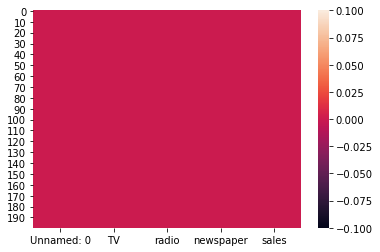

In [7]:
plt.figure()
sns.heatmap(df.isnull(),)   #missing values can be visualized using graphs

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
#removing the 'Unnamed: 0' column from dataset permanently
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
#Performing univariate and bivariate analysis using different visualization techniques

Text(0.5, 1.0, 'Graph of Independent Variables v/s Sales')

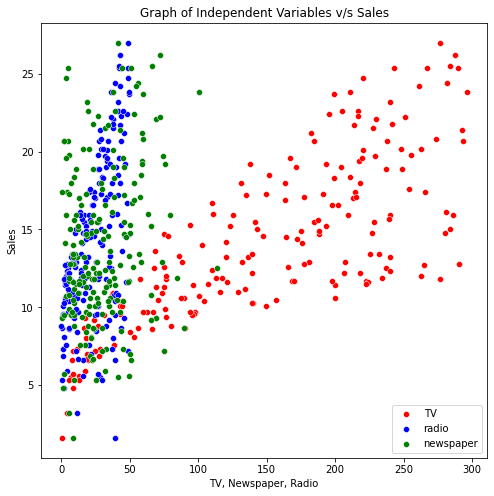

In [11]:
#plotting the relationship between individual features with target variables
#analysing the relation between dependent and independent variables

plt.figure(figsize=(8,8), facecolor='white')
sns.scatterplot(x=df['TV'],y=df['sales'],color ='red', )

sns.scatterplot(x=df['radio'],y=df['sales'],color ='blue')

sns.scatterplot(x=df['newspaper'],y=df['sales'],color ='green')


plt.legend(df.columns)
plt.xlabel("TV, Newspaper, Radio")
plt.ylabel("Sales")
plt.title("Graph of Independent Variables v/s Sales")

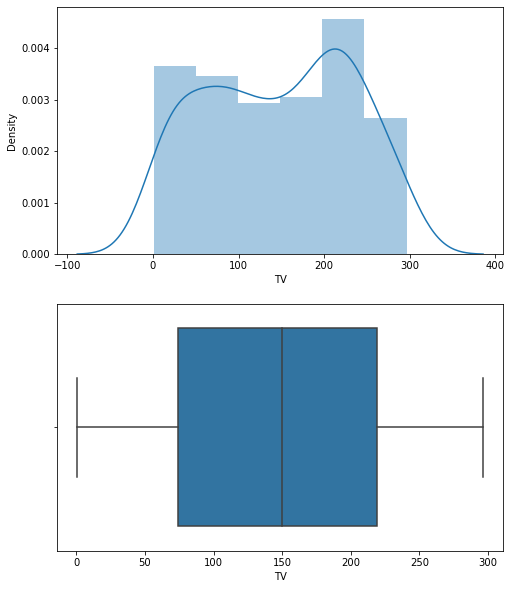

In [12]:
#checking the distribution of data over the columns
plt.figure(figsize=(8,10), facecolor='white')
ax = plt.subplot(2,1,1) 
sns.distplot(df['TV'])

ax = plt.subplot(2,1,2)
sns.boxplot(df['TV'],orient='v')
 
plt.show()

In [14]:
#Distplot displays data distribution of a variable against the density distribution.
#Box plot hepls in measuring how well distributed the data in a data set is.

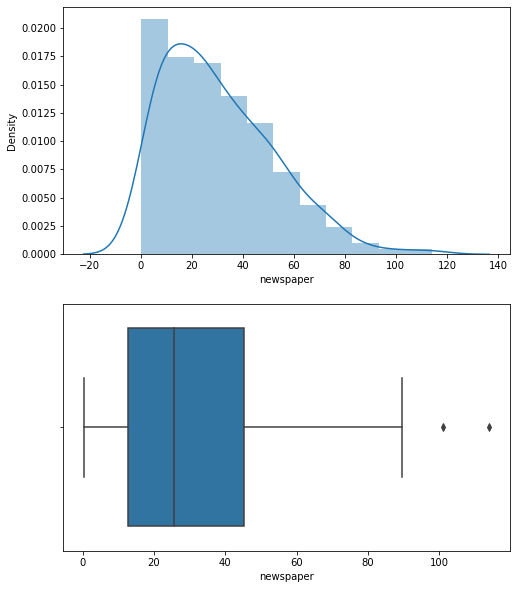

In [15]:
plt.figure(figsize=(8,10), facecolor='white')
ax = plt.subplot(2,1,1) 
sns.distplot(df['newspaper'])

ax = plt.subplot(2,1,2)
sns.boxplot(df['newspaper'],orient='v')
 
plt.show()

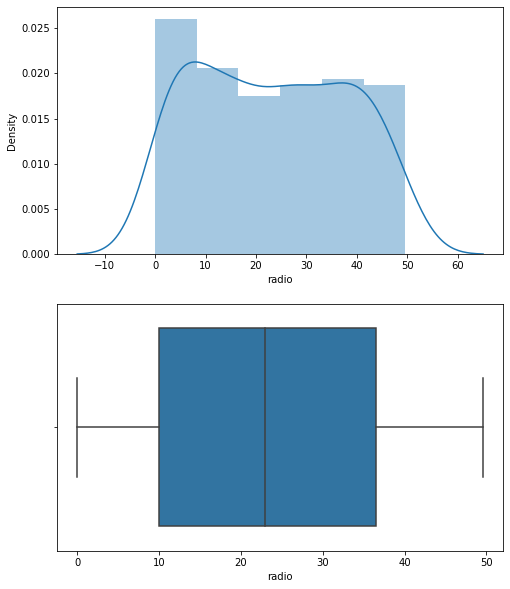

In [16]:
plt.figure(figsize=(8,10), facecolor='white')
ax = plt.subplot(2,1,1) 
sns.distplot(df['radio'])

ax = plt.subplot(2,1,2)
sns.boxplot(df['radio'],orient='v')
 
plt.show()

<Figure size 576x720 with 0 Axes>

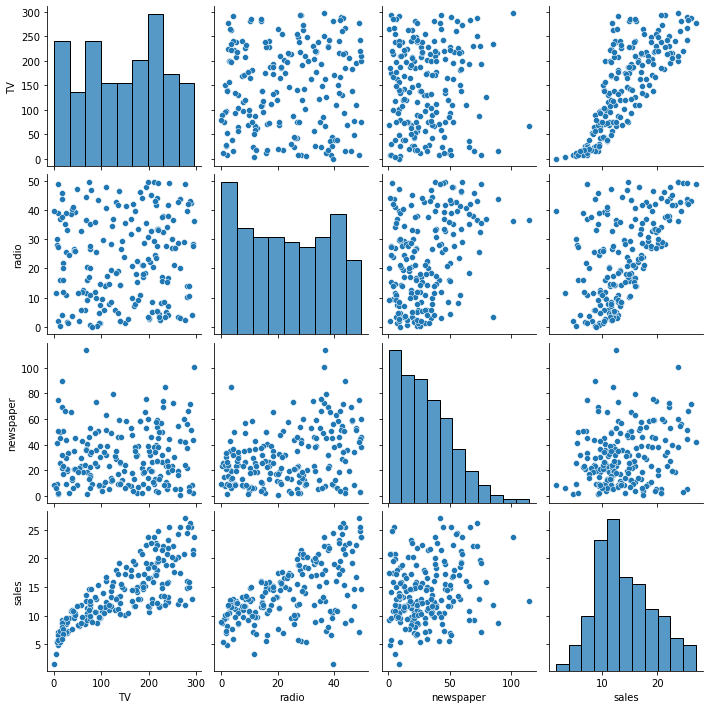

In [17]:
plt.figure(figsize=(8,10), facecolor='white')
sns.pairplot(df)
plt.show()

In [18]:
#From above graphs,

#We can clearly visualize that TV has dominant role in increasing the sales compared to Radio or newspaper. TV is in linear relationship with Sales, followed by Radio then newspaper.
#The values are much scattered for independent variable, which indicates less correlation.

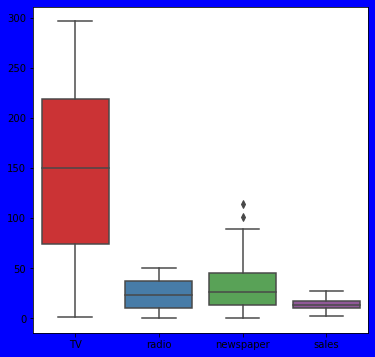

In [19]:
#Checking for Outliers using visualization plots
plt.figure(figsize=(6,6), facecolor='blue')
sns.boxplot(data=df, palette='Set1')
plt.show()

In [20]:
#We can see there are no much outliers that can affect our data. We are much clear.
#Skewness of newspaper to be handled.

In [21]:
#let us separate independent and dependent variables
X = df.drop(columns='sales')
y = df['sales']

In [22]:
#standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#checking for the multicollinearity between the independent features
vif =pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [24]:
vif

,Features,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


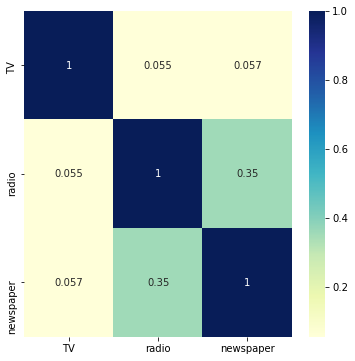

In [25]:
#generating the heatmaps to visualize multicollinearity
corr = X.corr()
plt.figure(figsize=(6,6), facecolor='white')
sns.heatmap(corr, annot=True,cmap='YlGnBu')
plt.show()

In [26]:
#From the above observations,

#As the VIF values are less then 5 we can see that there is small VIF values indicates low correlation among variables under ideal conditions.
#It is evident from the graph that, the independent and dependent variables are in good correlation range.

In [27]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

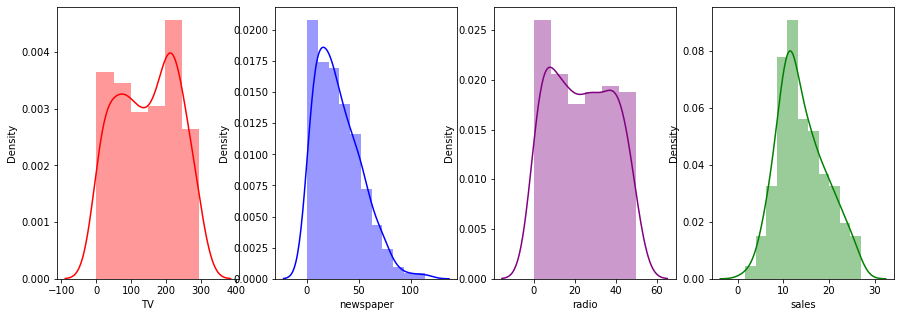

In [28]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,4,1)
sns.distplot(df['TV'],color='red')
ax = plt.subplot(1,4,2)
sns.distplot(df['newspaper'],color='blue')
ax = plt.subplot(1,4,3)
sns.distplot(df['radio'],color='purple')
ax = plt.subplot(1,4,4)
sns.distplot(df['sales'],color='green')
plt.show()

In [29]:
#applying log transformation
df['newspaper']=np.log(df['newspaper'])

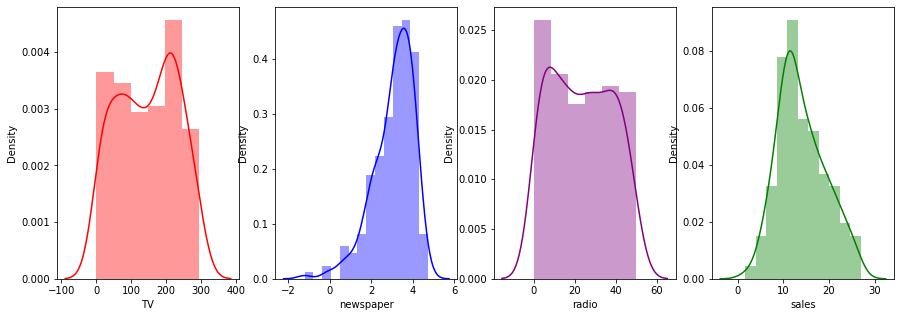

In [30]:
#visualizing the data after reducing the skewness
plt.figure(figsize=(15,5))
ax = plt.subplot(1,4,1)
sns.distplot(df['TV'],color='red')
ax = plt.subplot(1,4,2)
sns.distplot(df['newspaper'],color='blue')
ax = plt.subplot(1,4,3)
sns.distplot(df['radio'],color='purple')
ax = plt.subplot(1,4,4)
sns.distplot(df['sales'],color='green')
plt.show()

In [31]:
#model building , linear regression

In [32]:
#Selecting the best random state to get maximum accuracy.
m_acc=0
m_RS=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=i)
    lr= LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    acc = r2_score(y_test, pred)
    if acc > m_acc:
        m_acc= acc
        m_RS=i
print("The max accuracy is",m_acc, 'seen for random state:',i)

The max accuracy is 0.9329679186406995 seen for random state: 99


In [33]:
#selecting 99 as randomstate as we got best result
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=99)

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The r2 score is: 0.9175057618627588
The mean absolute error 1.1800573313063336
The mean squared error 2.0630782729801593
root mean square error 1.4363419763343823
The cross validation score 0.8871063495438435

*****************XXXXXXXXXXX********************


In [35]:
#applying GridsearchCV to improve accuracy
par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=1)

In [36]:
#predicting the results
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

The best estimators: LinearRegression(normalize=True)
The best score: 0.8695081984046104
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [39]:
#RE INSTANTIATING WITH BEST PARAMETERS
grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(X_train, y_train)
y_pred1 = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred1)))
cv = cross_val_score(grid_lm, X,y,cv=5)
print('The cross validation score', cv.mean())



*******************Results********************
The r2 score is: 0.9175057618627588
The mean absolute error 1.1800573313063336
The mean squared error 2.0630782729801593
root mean square error 1.4363419763343823
The cross validation score 0.8871063495438436


In [40]:
#USING LASSO REGULARIZATION
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [41]:
pred = lasso.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, pred)))
cv = cross_val_score(lasso, X,y,cv=5)
print('The cross validation score', cv.mean())

*******************Results********************
The r2 score is: 0.8435843627622954
The mean absolute error 1.4342153986361934
The mean squared error 3.9117605062622673
root mean square error 1.9778171063731518
The cross validation score 0.8882007416256036


In [42]:
#applying GridsearchCV to improve accuracy
param = {'alpha': np.arange(0.0001,0.1,0.001)}
grid_lass= GridSearchCV(estimator=lasso,param_grid=param,n_jobs=2,cv=5,verbose=2)

grid_lass.fit(X_train,y_train)
pred1 = grid_lass.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_lass.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
*******************Results********************
The r2 score is: 0.9196063288432903
The best score: 0.8721871102220129


In [43]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
y_pred = knn_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(knn_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

*******************Results********************
The r2 score is: 0.9043544588943169
The mean absolute error 1.0332
The mean squared error 2.3919759999999997
root mean square error 1.5466014354060325
The cross validation score 0.9085710686189529


In [44]:
#applying GridsearchCV to improve accuracy
param = {'algorithm':['kd_tree'], 
         'n_neighbors':[3,2,4,6,8,10,14,7,11]}
grid_knn = GridSearchCV(estimator=knn_reg, param_grid=param)
grid_knn.fit(X_train,y_train)

grid_knn.fit(X_train,y_train)

pred1 = grid_knn.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_knn.best_score_)

*******************Results********************
The r2 score is: 0.9088699174001298
The best score: 0.9133029282584472


In [45]:
random_reg = RandomForestRegressor()
random_reg.fit(X_train,y_train)
y_pred = random_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(random_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

*******************Results********************
The r2 score is: 0.9805637937368815
The mean absolute error 0.5340600000000016
The mean squared error 0.4860753400000013
root mean square error 0.6971910355132238
The cross validation score 0.9748481242307513


In [46]:
#hyperparameter 
n_estimator = [int(x) for x in np.linspace(start=10, stop=120,num=10)]

#number of features to be considered at each split
max_features = ['auto','sqrt']

#max number of tree
max_depth=[int(x) for x in np.linspace(5,50,num=6)]

#minimum number of samples for split
min_samples_split = [2,5,3,7,8,4]

#min number of samples for leaf split
min_samples_leaf = [1,3,2,5,7,8,4,12,15,17,9,20]

param = {'n_estimators':n_estimator, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}

In [47]:
random_cv = RandomizedSearchCV(estimator=random_reg, param_distributions=param, n_iter=4, cv=5, n_jobs=2,verbose=2)
random_cv.fit(X_train, y_train)
pred = random_cv.predict(X_test)


print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred))
print("The best score:", random_cv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
*******************Results********************
The r2 score is: 0.979647702294923
The best score: 0.9645714186278352


In [48]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train,y_train)
y_pred = gb_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gb_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

*******************Results********************
The r2 score is: 0.9774398911456382
The mean absolute error 0.5848752451487518
The mean squared error 0.5642002576721739
root mean square error 0.7511326498509926
The cross validation score 0.9774726947282142


In [50]:
#applying RandomsearchCV to improve accuracy

params = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]}

random_gb = RandomizedSearchCV(gb_reg,param_distributions=params,n_iter=30,n_jobs=2,cv=6,verbose=2)
random_gb.fit(X_train,y_train)
          
pred = random_gb.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred))
print("The best score:", random_gb.best_score_)

Fitting 6 folds for each of 30 candidates, totalling 180 fits
*******************Results********************
The r2 score is: 0.9784786175844309
The best score: 0.9728572265391717


In [51]:
#BEST MODEL:
#The model with least diference in r_2 score and cross validation score is the best model Here Gradient boosting model is giving the least difference, Hence we can select this model to predict the data.

In [52]:
y_pred = gb_reg.predict(X_test)
print("The accuracy score of model is:",r2_score(y_test, y_pred)*100)

The accuracy score of model is: 97.74398911456382


In [53]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Advertising_regressor.pkl','wb')

In [54]:
#dump the information to the file
pickle.dump(gb_reg,file)